In [8]:
! pip install -q -U langchain_core langgraph langchain-google-genai

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv
from dotenv import load_dotenv
import os
from typing_extensions import TypedDict
from langchain_core.messages import HumanMessage,AnyMessage,AIMessage,SystemMessage

#Loading Environment Variables
load_dotenv()

#Storing api key in a variable
api_key = os.getenv("GEMINI_API_KEY")

llm : ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash",api_key=api_key)

def Multiply(a:int,b:int):
    """
    Multiplying two numbers
    
    Args:
    a: first int
    b: second int 
    """
    return a*b

llm_with_tool = llm.bind_tools([Multiply])

function_call = llm_with_tool.invoke([HumanMessage(content="What is 2 multiply 3 ?", name ="Shahmir")])
function_call.additional_kwargs


Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring
Key 'title' is not supported in schema, ignoring


{'name': 'Multiply', 'description': 'Multiplying two numbers\n\nArgs:\na: first int\nb: second int', 'parameters': {'type_': 6, 'description': 'Multiplying two numbers\n\nArgs:\na: first int\nb: second int ', 'properties': {'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}


{'function_call': {'name': 'Multiply', 'arguments': '{"a": 2.0, "b": 3.0}'}}

In [15]:
from langgraph.graph.message import add_messages

intial_message = HumanMessage(content="Hello !",name="Shahmir")
new_message = AIMessage(content="Hi! How can I help you")

add_messages(intial_message,new_message)

[HumanMessage(content='Hello !', additional_kwargs={}, response_metadata={}, name='Shahmir', id='6ba35342-d655-484f-8004-ae6d60913f79'),
 AIMessage(content='Hi! How can I help you', additional_kwargs={}, response_metadata={}, id='136f738a-ea0a-4038-9b2e-bfc55be28fa0')]

In [18]:
from langgraph.graph import MessagesState
from langgraph.graph import StateGraph
from langgraph.graph.graph import START,CompiledGraph,END

class MessagesState(MessagesState):
    pass


def llm_calling(state:MessagesState):
    return {"messages": [llm_with_tool.invoke(state["messages"])]}

builder : StateGraph = StateGraph(MessagesState)

builder.add_node("llm_calling",llm_calling)

builder.add_edge(START,"llm_calling")
builder.add_edge('llm_calling',END)

graph: CompiledGraph = builder.compile()

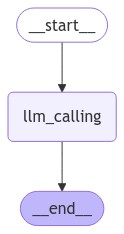

In [19]:
from IPython.display import display,Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 7 with 7")})

for m in messages["messages"]:
    m.pretty_print()

{'name': 'Multiply', 'description': 'Multiplying two numbers\n\nArgs:\na: first int\nb: second int', 'parameters': {'type_': 6, 'description': 'Multiplying two numbers\n\nArgs:\na: first int\nb: second int ', 'properties': {'a': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'b': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['a', 'b'], 'format_': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}}
================================ Human Message =================================

Multiply 7 with 7
================================== Ai Message ==================================
Tool Calls:
  Multiply (872478f1-f389-4fee-a28d-457c981111c4)
 Call ID: 872478f1-f389-4fee-a28d-457c981111c4
  Args:
    a: 7.0
    b: 7.0
